## Project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset. This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning.

This step-by-step project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [3]:
properties = pd.read_csv('Data\\properties_2016.csv')
transactions = pd.read_csv('Data\\train_2016_v2.csv')

#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [4]:
df_train = transactions.merge(properties, how='left', on='parcelid')
df_train.drop(['parcelid', 'transactiondate'], axis='columns', inplace=True)
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [7]:
_missing_count = df_train.apply(lambda x: x.isna().sum(), axis=0)
_missing_count.sort_values(ascending=False, inplace=True)
missing_df = pd.DataFrame({'features': _missing_count.index, 'missing_count': _missing_count.array})
missing_df = missing_df.loc[missing_df['missing_count'] > 0]

#### 3.(b) Draw a horizontal bar plot to visualize it.

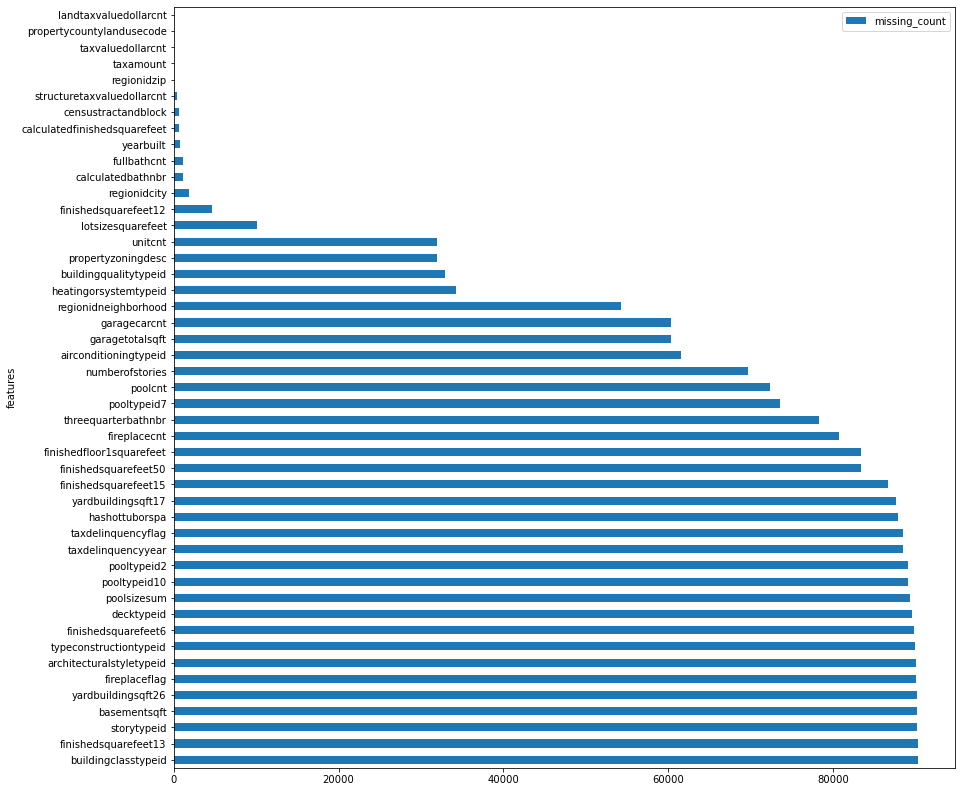

In [8]:
missing_df.plot(x='features', y='missing_count', kind='barh', figsize=(14, 14))

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [9]:
categorical_columns = [
    'airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 
    'hashottuborspa', 'heatingorsystemtypeid', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 
    'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 
    'regionidzip', 'storytypeid', 'typeconstructiontypeid', 'yearbuilt', 'taxdelinquencyflag'
]
numeric_columns = [x for x in df_train.columns if x not in categorical_columns]

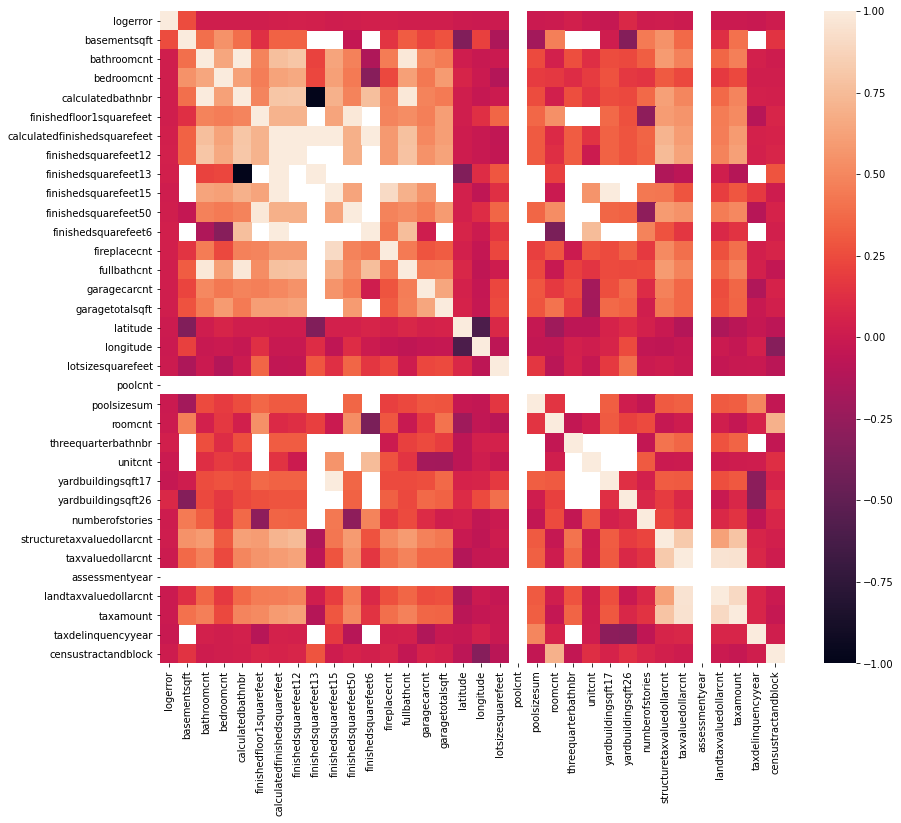

In [11]:
corr = df_train.loc[:, numeric_columns].corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corr)
plt.show()

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [13]:
to_drop = []
to_drop.extend(['finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet6'])  # 'calculatedfinishedsquarefeet'
to_drop.append('finishedsquarefeet50')  # 'finishedfloor1squarefeet'
to_drop.extend(['calculatedbathnbr', 'fullbathcnt'])  # 'bathroomcnt'

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [17]:
df_train.loc[df_train['hashottuborspa'].isna(), 'hashottuborspa'] = 'N/A'

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [19]:
for c in ['pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt']:
    df_train.loc[df_train[c].isna(), c] = 0

(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [21]:
df_train.loc[df_train['taxdelinquencyflag'].isna(), 'taxdelinquencyflag'] = 'None'

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [23]:
df_train.loc[df_train['garagecarcnt'].isna(), 'garagecarcnt'] = 0
df_train.loc[(df_train['garagecarcnt'] == 0) | df_train['garagetotalsqft'].isna(), 'garagetotalsqft'] = 0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [24]:
poolsizesum_median = df_train.loc[df_train['poolcnt'] > 0, 'poolsizesum'].median()
df_train.loc[(df_train['poolcnt'] > 0) & df_train['poolsizesum'].isna(), 'poolsizesum'] = poolsizesum_median

In [25]:
df_train.loc[df_train['poolcnt'] == 0, 'poolsizesum'] = 0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [27]:
df_train['fireplaceflag'] = 'No'
df_train.loc[df_train['fireplacecnt'] > 0, 'fireplaceflag'] = 'Yes'

In [28]:
df_train.loc[df_train['fireplacecnt'].isna(), 'fireplacecnt'] = 0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [29]:
df_train.loc[df_train['airconditioningtypeid'].isna(), 'airconditioningtypeid'] = 1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [30]:
df_train.loc[df_train['heatingorsystemtypeid'].isna(), 'heatingorsystemtypeid'] = 2

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [33]:
na_ratio = (df_train.isna().sum() / len(df_train)).reset_index()
na_ratio.columns = ['feature', 'missing_ratio']
na_ratio.sort_values(by='missing_ratio', ascending=False, inplace=True)
na_ratio.loc[na_ratio['missing_ratio'] > 0]

,feature,missing_ratio
6,buildingclasstypeid,0.999823
13,finishedsquarefeet13,0.999634
3,basementsqft,0.999524
41,storytypeid,0.999524
46,yardbuildingsqft26,0.998948
2,architecturalstyletypeid,0.997109
43,typeconstructiontypeid,0.996688
16,finishedsquarefeet6,0.995336
9,decktypeid,0.992711
56,taxdelinquencyyear,0.980249


In [42]:
to_drop.extend(na_ratio.loc[na_ratio['missing_ratio'] > 0.97, 'feature'].to_list())
to_drop

['finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet6',
 'finishedsquarefeet50',
 'calculatedbathnbr',
 'fullbathcnt',
 'buildingclasstypeid',
 'finishedsquarefeet13',
 'basementsqft',
 'storytypeid',
 'yardbuildingsqft26',
 'architecturalstyletypeid',
 'typeconstructiontypeid',
 'finishedsquarefeet6',
 'decktypeid',
 'taxdelinquencyyear',
 'yardbuildingsqft17',
 'buildingclasstypeid',
 'finishedsquarefeet13',
 'basementsqft',
 'storytypeid',
 'yardbuildingsqft26',
 'architecturalstyletypeid',
 'typeconstructiontypeid',
 'finishedsquarefeet6',
 'decktypeid',
 'taxdelinquencyyear',
 'yardbuildingsqft17']

In [43]:
df_train.drop(to_drop, axis='columns', inplace=True)